# Comparative Evaluation - Melodic Masks

This notebook makes a comparative evaluation of all melodic masks produced with the spectrogram of the real melodic source espectrogram. The measure used was the norm  of the difference between the spectrograms.

The values of difference are not perceptually equivalents, some values are greater but perceptually the results could be similar, on the other hand, small values could be perceptually relevants. Then, this measure is only to quantify the precision of information retrieval of the separation.

In [1]:
import librosa
import scipy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Open annotation file
import csv

# Get signal processing functions
import scipy.signal as signal

# Make melodic mask
import src.core as utils

In [2]:
# Example 1 - Woman Singer
audio_path = '../../../MedleyDB/Audio/LizNelson_Rainfall/LizNelson_Rainfall_MIX.wav'
# Annotation 1
annot_path = "../../../MedleyDB/Annotations/Melody_Annotations"\
           +"/MELODY1/LizNelson_Rainfall_MELODY1.csv"
# Melody audio
melody_path = "../../../MedleyDB/Audio/LizNelson_Rainfall/LizNelson_Rainfall_RAW/"\
            +"LizNelson_Rainfall_RAW_01_01.wav"

In [3]:
# Example 2 - Guitar solo
audio_path = '../../../MedleyDB/Audio/ChrisJacoby_BoothShotLincoln/'\
            +'ChrisJacoby_BoothShotLincoln_MIX.wav'
# Annotation 2
annot_path = "../../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/ChrisJacoby_BoothShotLincoln_MELODY1.csv"
# Melody audio
melody_path = "../../../MedleyDB/Audio/ChrisJacoby_BoothShotLincoln"\
            +"/ChrisJacoby_BoothShotLincoln_RAW/ChrisJacoby_BoothShotLincoln_RAW_02_01.wav"

In [4]:
# Example 3 - Man Singer
audio_path = '../../../MedleyDB/Audio/Debussy_LenfantProdigue/'\
            +'Debussy_LenfantProdigue_MIX.wav'
# Annotation 
annot_path = "../../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/Debussy_LenfantProdigue_MELODY1.csv"
# Melody audio
melody_path = "../../../MedleyDB/Audio/Debussy_LenfantProdigue/"\
            +"Debussy_LenfantProdigue_RAW/Debussy_LenfantProdigue_RAW_01_01.wav"

In [5]:
# Example 4 - Orchestra Example
audio_path = '../../../MedleyDB/Audio/MusicDelta_Beethoven/'\
            +'MusicDelta_Beethoven_MIX.wav'
# Annotation 
annot_path = "../../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/MusicDelta_Beethoven_MELODY1.csv"
# Melody audio
melody_path = "../../../MedleyDB/Audio/MusicDelta_Beethoven/"\
            +"MusicDelta_Beethoven_RAW/MusicDelta_Beethoven_RAW_06_01.wav"

In [6]:
# Example 5 - Punk
audio_path = '../../../MedleyDB/Audio/MusicDelta_Punk/'\
            +'MusicDelta_Punk_MIX.wav'
# Annotation 
annot_path = "../../../MedleyDB/Annotations/Melody_Annotations"\
            +"/MELODY1/MusicDelta_Punk_MELODY1.csv"
# Melody audio
melody_path = "../../../MedleyDB/Audio/MusicDelta_Punk/"\
             +"MusicDelta_Punk_RAW/MusicDelta_Punk_RAW_04_01.wav"

Notebook structure:

- Load an audio file
- Compute the spectrogram, get melodic line
- For each strategy:
    - Compute the melodic mask and apply it to the audio and to the melodic instrument
    - Compute the norms between these masks and define the measures

In [5]:
audio, sr = librosa.load(audio_path, sr=44100)

# Calculate the complex spectrogram 
D = librosa.stft(audio, window=signal.cosine)

In [6]:
melody = []
timestamps = []

with open(annot_path) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        timestamps.append(float(row[0]))
        melody.append(float(row[1]))
        
# Append element to make size equal of spectrogram
melody.append(0)
timestamps.append(0)

# None to values less equals 0
melody_pos = melody[:].copy()
for i in range(len(melody_pos)):
    if melody_pos[i] <= 0:
        melody_pos[i] = None

In [7]:
# Load the melodic instrument audio
melodyAudio, sr = librosa.load(melody_path, sr=44100)

# Calculate the complex spectrogram 
M = librosa.stft(melodyAudio, window=signal.cosine)

In [8]:
def evaluateMask(specMelodic, D, M):
    MaskInstrument = specMelodic.astype(float)*M
    MaskMusic      = specMelodic.astype(float)*D

    R = (np.linalg.norm(MaskInstrument)/np.linalg.norm(M))**2
    
    print ("Accuracy      ", R)

    P = (np.linalg.norm(MaskInstrument)/np.linalg.norm(MaskMusic))**2

    print ("Noise Level   ", P)
    
    F1 = 2 * P * R / (P + R)
    
    print ("F-measure     ", F1)

In [9]:
def saveAudio(name, spec):
    # Save the audio signal melodic
    y_m = librosa.core.istft(spec)
    librosa.output.write_wav(name, y_m, sr, norm=False)

In [10]:
def plotSpectrograms(inst, mask):
    plt.figure(figsize=(13,4))
    librosa.display.specshow(librosa.logamplitude(np.abs(inst)**2, ref_power=np.max), 
                             y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Melodic spectrogram created by Melodic Mask 1')
    plt.show()


    plt.figure(figsize=(13,4))
    librosa.display.specshow(librosa.logamplitude(np.abs(mask)**2, ref_power=np.max), 
                         y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Melodic spectrogram from Melodic Instrument')
    plt.show()

## Example 1

Accuracy       0.0299986397707
Noise Level    0.0179071498186
F-measure      0.0224269400978


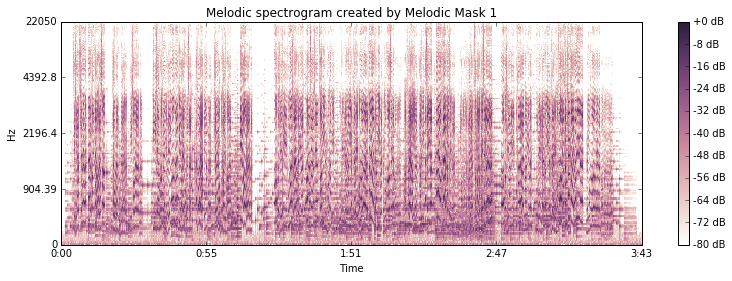

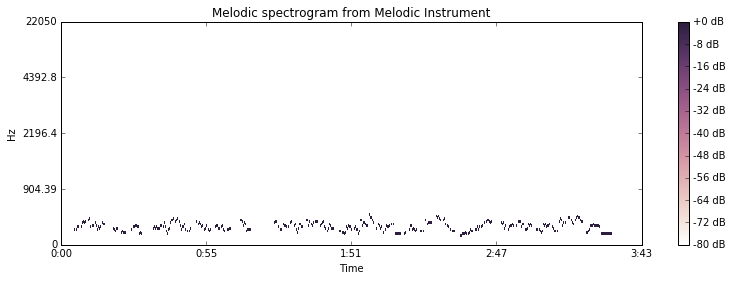

In [11]:
# Generate a melodic mask based on Melodia contours 
specMelodic = utils.generateMelodicMask(D, melody, kind=1)

evaluateMask(specMelodic, D, M)

plotSpectrograms(M, specMelodic)

saveAudio("example_1_melody.wav", specMelodic.astype(float)*D)

## Example 2

Accuracy       0.328787196003
Noise Level    0.0318632256133
F-measure      0.0580962615158


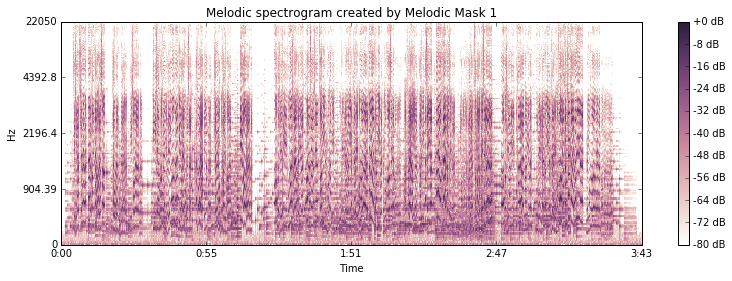

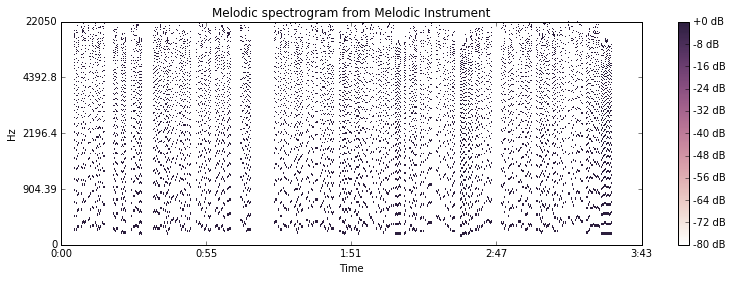

In [12]:
# Generate a melodic mask based on Melodia contours
specMelodic = utils.generateMelodicMask(D, melody, kind=2, n_harm=50)

evaluateMask(specMelodic, D, M)

plotSpectrograms(M, specMelodic)

saveAudio("example_2_melody.wav", specMelodic.astype(float)*D)

## Example 3

Accuracy       0.628977198546
Noise Level    0.0303180725022
F-measure      0.0578477569767


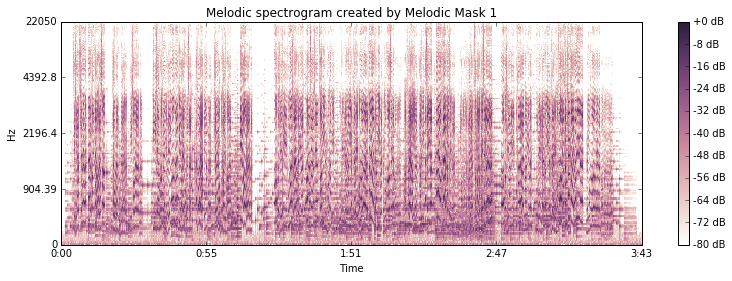

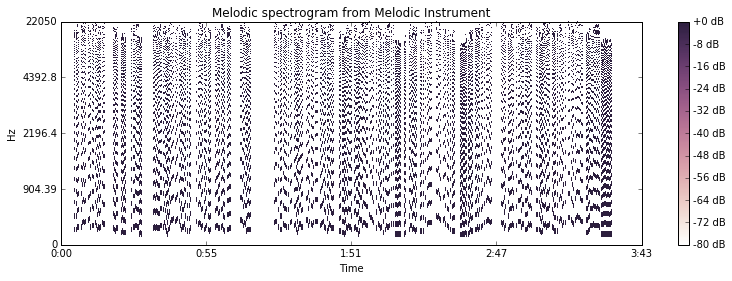

In [13]:
specMelodic = utils.generateMelodicMask(D, melody, kind=3, n_harm=50)

evaluateMask(specMelodic, D, M)

plotSpectrograms(M, specMelodic)

saveAudio("example_3_melody.wav", specMelodic.astype(float)*D)



## Example 4

Accuracy       0.820621745756
Noise Level    0.0292989702761
F-measure      0.0565779176418


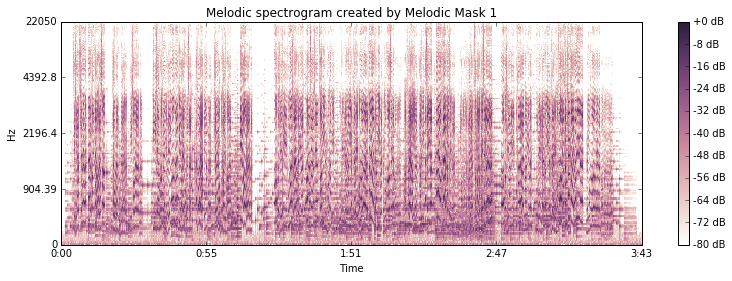

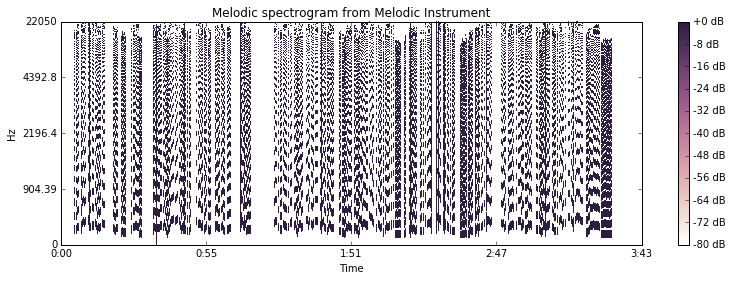

In [14]:
# Generate a melodic mask based on Melodia contours 
specMelodic = utils.generateMelodicMask(D, melody, kind=3, n_harm=50)
specMelodic = utils.spectralNoveltyFunction(D, specMelodic)

evaluateMask(specMelodic, D, M)

plotSpectrograms(M, specMelodic)

saveAudio("example_4_melody.wav", specMelodic.astype(float)*D)

## Example 5

Accuracy       0.668933535375
Noise Level    0.0305127923746
F-measure      0.0583633919216


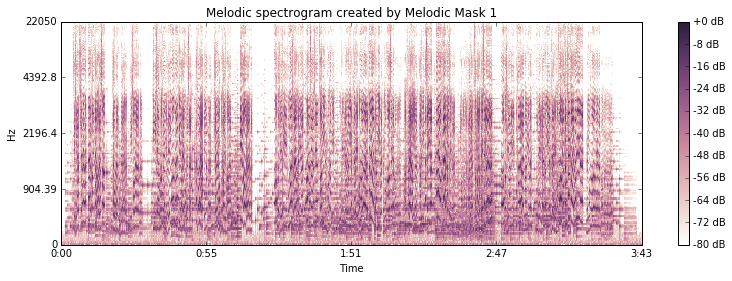

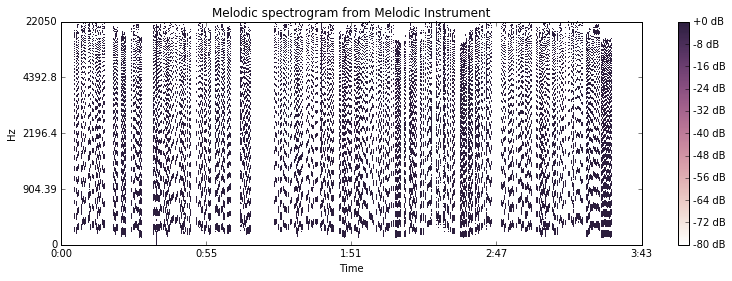

In [15]:
# Generate a melodic mask based on Melodia contours 
specMelodic = utils.generateMelodicMask(D, melody, kind=3, n_harm=50)
specDilated = utils.spectralNoveltyFunction(D, specMelodic)

# Getting masks from librosa 
mask_H, mask_P = librosa.decompose.hpss(D, mask=True)

specPercuss = np.maximum(np.multiply(specDilated, mask_P), specMelodic)

specMelodic = specPercuss

evaluateMask(specMelodic, D, M)

plotSpectrograms(M, specMelodic)

saveAudio("example_5_melody.wav", specMelodic.astype(float)*D)

## Example 6

Accuracy       0.832712866404
Noise Level    0.0280706678122
F-measure      0.0543105329658


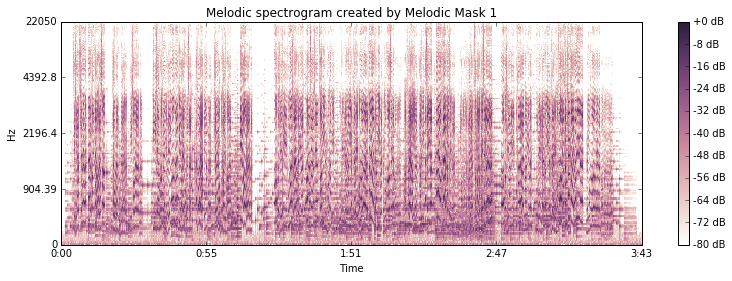

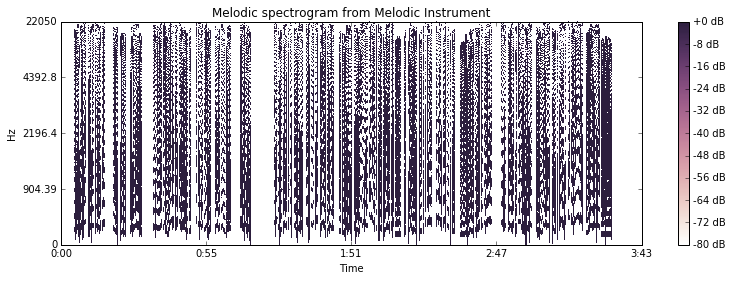

In [16]:
# Generate a melodic mask based on Melodia contours 
# You also can define the number of harmonics
specMelodic = utils.generateMelodicMask(D, melody, kind=3, n_harm=50)
specHit, specHitDilated, specMax = utils.hitMissDilateMask(specMelodic)
del specHit, specHitDilated

specMelodic = specMax

evaluateMask(specMelodic, D, M)

plotSpectrograms(M, specMelodic)

saveAudio("example_6_melody.wav", specMelodic.astype(float)*D)

## Example 7

Accuracy       0.678259780627
Noise Level    0.0304473146051
F-measure      0.0582784878653


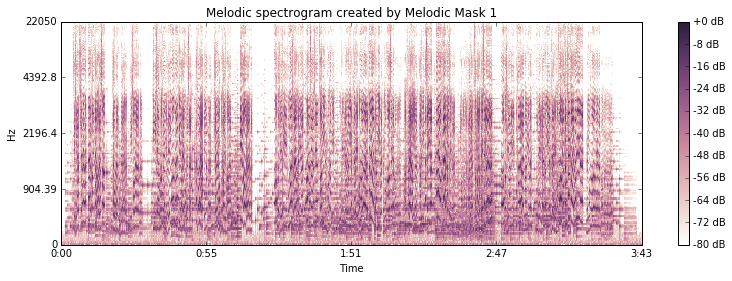

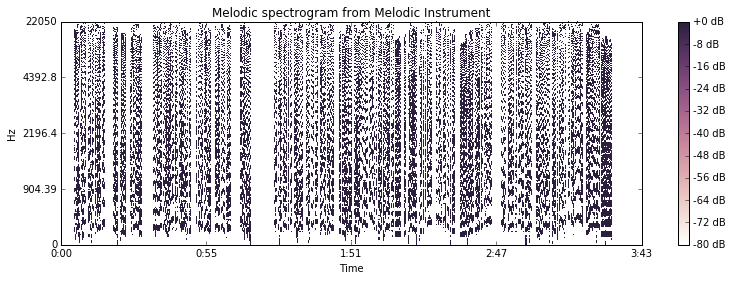

In [17]:
# Generate a melodic mask based on Melodia contours 
# You also can define the number of harmonics
specMelodic = utils.generateMelodicMask(D, melody, kind=3, n_harm=50)
specHit, specHitDilated, specMax = utils.hitMissDilateMask(specMelodic)
del specHit, specHitDilated

# Getting masks from librosa 
mask_H, mask_P = librosa.decompose.hpss(D, mask=True)

specPercuss = np.maximum(np.multiply(specMax, mask_P), specMelodic)

specMelodic = specPercuss

evaluateMask(specMelodic, D, M)

plotSpectrograms(M, specMelodic)

saveAudio("example_7_melody.wav", specMelodic.astype(float)*D)